In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import *
%matplotlib inline

In [ ]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 🚢 Explorando os dados

In [ ]:
#file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
#dados = pd.read_csv(file_name)

In [ ]:
dados = pd.read_csv('desafio_01_preco_imoveis.csv')

In [ ]:
dados.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
len(dados)

21613

In [ ]:
dados.shape

(21613, 19)

In [ ]:
dados.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [ ]:
print('A base de dados contém {} registros \n'.format(dados.shape[0]))

A base de dados contém 21613 registros 



In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
dados.describe().round(2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4.580302e+09,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21
std,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14
min,1.000102e+06,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52
25%,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33
50%,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23
75%,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12
max,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32


In [ ]:
dados.corr().round(4)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.0000,-0.0168,0.0013,0.0052,-0.0123,-0.1321,0.0185,-0.0027,0.0116,-0.0238,0.0081,-0.0108,-0.0052,0.0214,-0.0169,-0.0082,-0.0019,0.0208
price,-0.0168,1.0000,0.3083,0.5251,0.7020,0.0897,0.2568,0.2664,0.3973,0.0364,0.6674,0.6056,0.3238,0.0540,0.1264,-0.0532,0.3070,0.0216
bedrooms,0.0013,0.3083,1.0000,0.5159,0.5767,0.0317,0.1754,-0.0066,0.0795,0.0285,0.3570,0.4776,0.3031,0.1542,0.0188,-0.1527,-0.0089,0.1295
bathrooms,0.0052,0.5251,0.5159,1.0000,0.7547,0.0877,0.5007,0.0637,0.1877,-0.1250,0.6650,0.6853,0.2838,0.5060,0.0507,-0.2039,0.0246,0.2230
sqft_living,-0.0123,0.7020,0.5767,0.7547,1.0000,0.1728,0.3539,0.1038,0.2846,-0.0588,0.7627,0.8766,0.4350,0.3180,0.0554,-0.1994,0.0525,0.2402
sqft_lot,-0.1321,0.0897,0.0317,0.0877,0.1728,1.0000,-0.0052,0.0216,0.0747,-0.0090,0.1136,0.1835,0.0153,0.0531,0.0076,-0.1296,-0.0857,0.2295
floors,0.0185,0.2568,0.1754,0.5007,0.3539,-0.0052,1.0000,0.0237,0.0294,-0.2638,0.4582,0.5239,-0.2457,0.4893,0.0063,-0.0591,0.0496,0.1254
waterfront,-0.0027,0.2664,-0.0066,0.0637,0.1038,0.0216,0.0237,1.0000,0.4019,0.0167,0.0828,0.0721,0.0806,-0.0262,0.0929,0.0303,-0.0143,-0.0419
view,0.0116,0.3973,0.0795,0.1877,0.2846,0.0747,0.0294,0.4019,1.0000,0.0460,0.2513,0.1676,0.2769,-0.0534,0.1039,0.0848,0.0062,-0.0784
condition,-0.0238,0.0364,0.0285,-0.1250,-0.0588,-0.0090,-0.2638,0.0167,0.0460,1.0000,-0.1447,-0.1582,0.1741,-0.3614,-0.0606,0.0030,-0.0149,-0.1065


In [ ]:
corr = dados.corr().round(4)
corr_price = corr['price']
corr_price.sort_values()

zipcode         -0.0532
id              -0.0168
long             0.0216
condition        0.0364
yr_built         0.0540
sqft_lot         0.0897
yr_renovated     0.1264
floors           0.2568
waterfront       0.2664
lat              0.3070
bedrooms         0.3083
sqft_basement    0.3238
view             0.3973
bathrooms        0.5251
sqft_above       0.6056
grade            0.6674
sqft_living      0.7020
price            1.0000
Name: price, dtype: float64

In [ ]:
for i in range(len(corr_price)):
  if abs(corr_price[i]) > 0.3:
    print(corr_price[i])

1.0
0.3083
0.5251
0.702
0.3973
0.6674
0.6056
0.3238
0.307


Não precisamos de todos esses dados, então vamos recortar nosso dataset. Escolheremos apenas algumas variáveis para influenciar na precificação do imóvel. Ou seja, o que não é relevante será descartado.

In [ ]:
dados = dados.dropna(axis = 0, how = 'any')

In [ ]:
dados.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

# 🔙 Modelos Regressivos: Análises

In [ ]:
dados.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045


In [ ]:
dados['price'].mean()

540088.1417665294

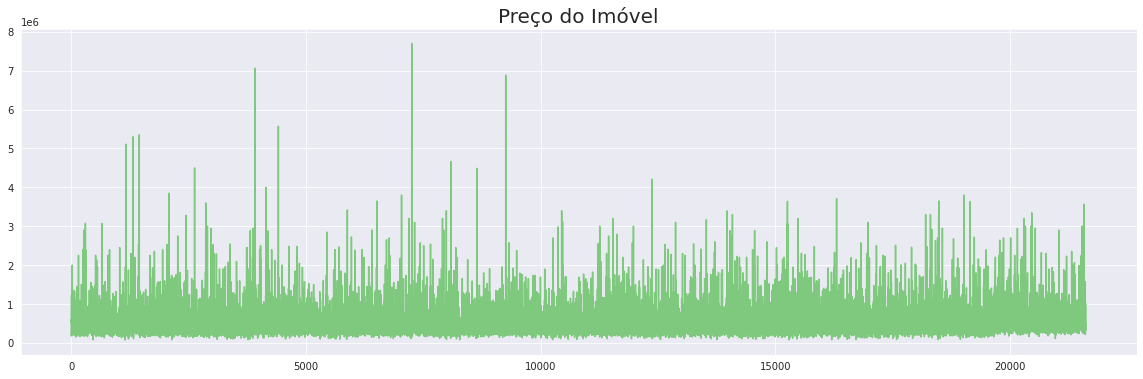

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6)) 
ax.set_title('Preço do Imóvel', fontsize=20)
ax = dados['price'].plot()

<Axes: title={'center': 'Preço do Imóvel'}>

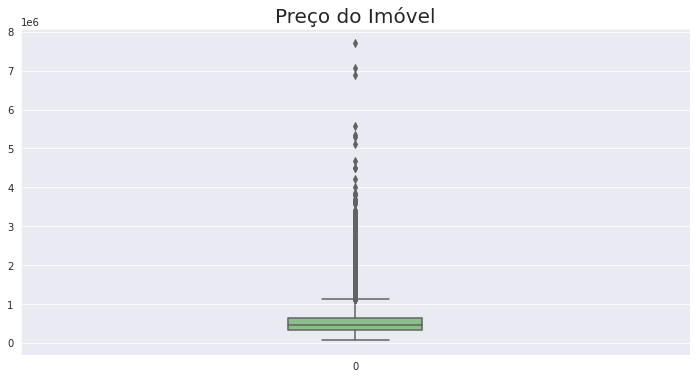

In [ ]:
ax = sns.boxplot(data=dados['price'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço do Imóvel', fontsize=20)
ax

<Axes: title={'center': 'Distrubuição de Frequências'}, xlabel='price', ylabel='Density'>

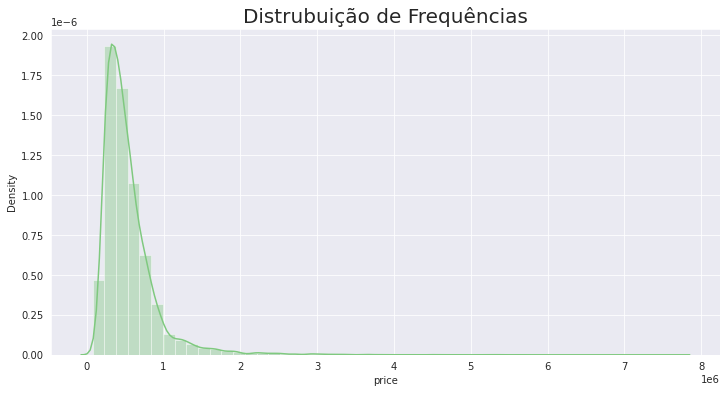

In [ ]:
ax = sns.distplot(dados['price'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distrubuição de Frequências', fontsize=20)
ax

## 🏡 Boxplots das variáveis dependentes

In [ ]:
dados.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

<Axes: title={'center': 'Preço do Imóvel De Acordo com a Data'}, xlabel='Datas', ylabel='Preço'>

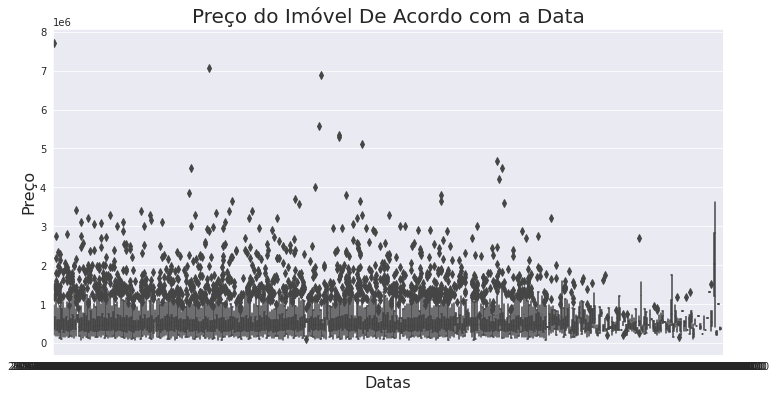

In [ ]:
ax = sns.boxplot(y='price', x='date', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço do Imóvel De Acordo com a Data', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Datas', fontsize=16)
ax

<Axes: title={'center': 'Preço do Imóvel De Acordo com o Número de Quartos'}, xlabel='Número de Quartos', ylabel='Preço'>

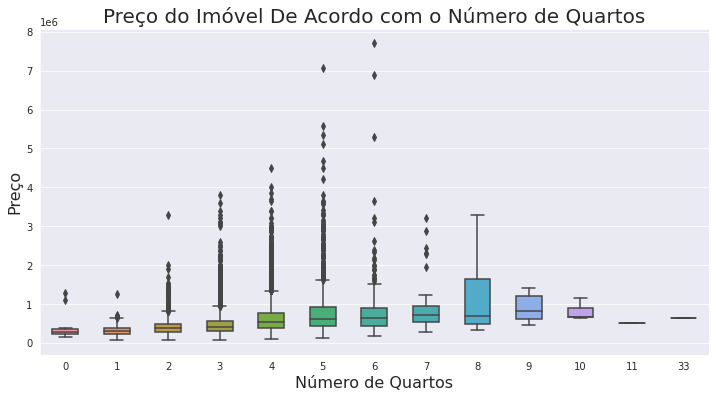

In [ ]:
ax = sns.boxplot(y='price', x='bedrooms', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço do Imóvel De Acordo com o Número de Quartos', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Número de Quartos', fontsize=16)
ax

<Axes: title={'center': 'Preço do Imóvel De Acordo com o Num. de Banheiros'}, xlabel='Número de Banheiros', ylabel='Preço'>

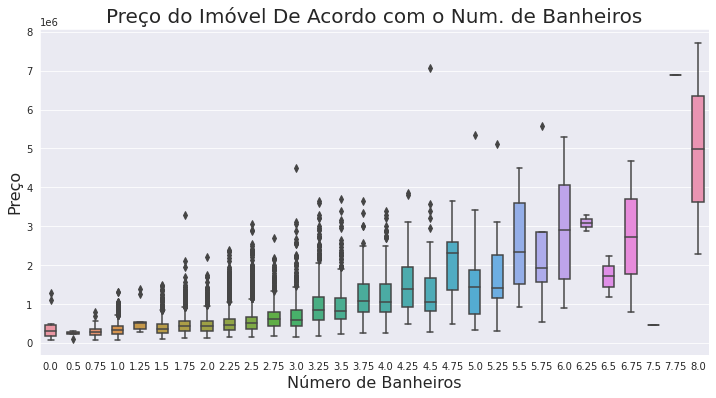

In [ ]:
ax = sns.boxplot(y='price', x='bathrooms', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço do Imóvel De Acordo com o Num. de Banheiros', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Número de Banheiros', fontsize=16)
ax

<Axes: xlabel='waterfront', ylabel='price'>

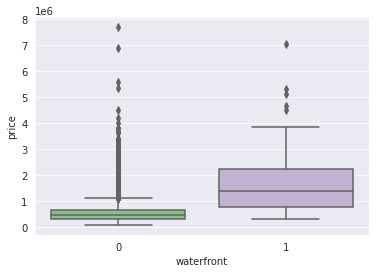

In [ ]:
sns.boxplot(x="waterfront", y="price", data=dados, orient='v')

<Axes: title={'center': 'Preço do Imóvel De Acordo com o Número de Andares'}, xlabel='Andares', ylabel='Preço'>

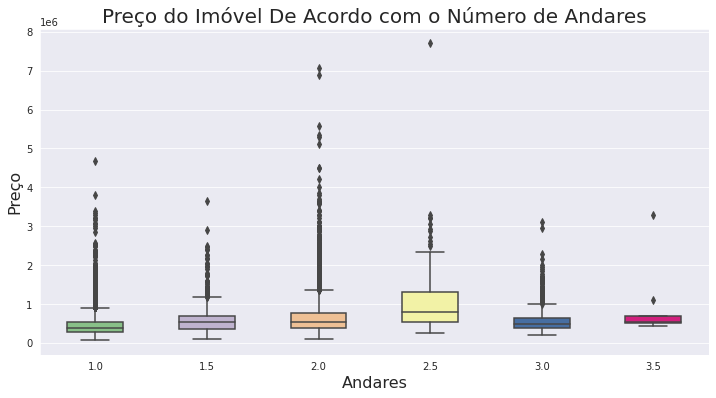

In [ ]:
ax = sns.boxplot(y='price', x='floors', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço do Imóvel De Acordo com o Número de Andares', fontsize=20)
ax.set_ylabel('Preço', fontsize=16)
ax.set_xlabel('Andares', fontsize=16)
ax

## 🌲Pairplot

* lat              0.3070
* bedrooms         0.3083
* sqft_basement    0.3238
* view             0.3973
* bathrooms        0.5251
* sqft_above       0.6056
* grade            0.6674
* sqft_living      0.7020

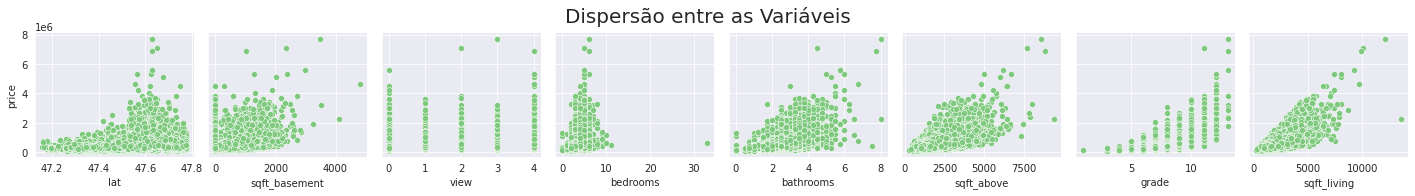

In [ ]:
ax = sns.pairplot(dados, y_vars='price', x_vars=['lat', 'sqft_basement', 'view', 'bedrooms', 'bathrooms', 'sqft_above', 'grade', 'sqft_living'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# ⚓ Modelo de Reguessão Linear

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
model = LinearRegression()

In [ ]:
y = dados['price']

In [ ]:
X = dados[['lat', 'sqft_basement', 'view', 'bedrooms', 'bathrooms', 'sqft_above', 'grade', 'sqft_living']]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.64


In [ ]:
y_previsto = model.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.64


## 🍉 Previsões Pontuais

In [ ]:
entrada = X_test[0:1]
entrada

,lat,sqft_basement,view,bedrooms,bathrooms,sqft_above,grade,sqft_living
3490,47.6367,0,0,4,2.75,3160,9,3160


In [ ]:
model.predict(entrada)[0]

860225.8026697449

Um exemplo aleatório, para testar nosso modelo:

In [ ]:
lat=100.000	
sqft_basement=1
view=1	
bedrooms=10
bathrooms=3.0
sqft_above=10000
grade=4
sqft_living=12000
entrada=[[lat, sqft_basement, view, bedrooms, bathrooms, sqft_above, grade, sqft_living]]

print('{0:.2f} price'.format(model.predict(entrada)[0]))

36895232.41 price


## 🍓 Análise Gráfica Para Previsões

In [ ]:
y_previsto_train = model.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Price - Previsão', ylabel='Price - Real'>

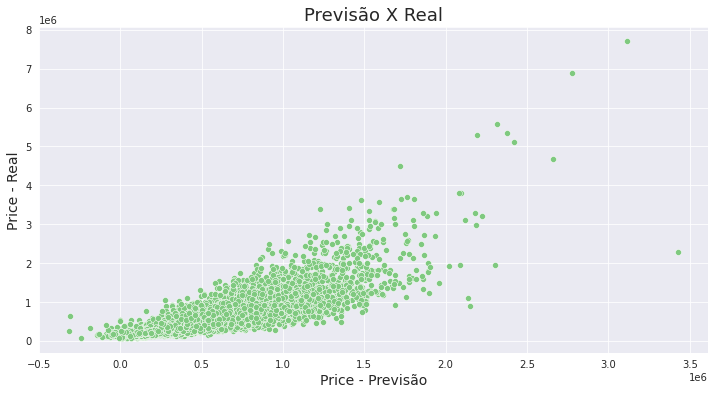

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Price - Previsão', fontsize=14)
ax.set_ylabel('Price - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Price - Previsão', ylabel='Resíduos'>

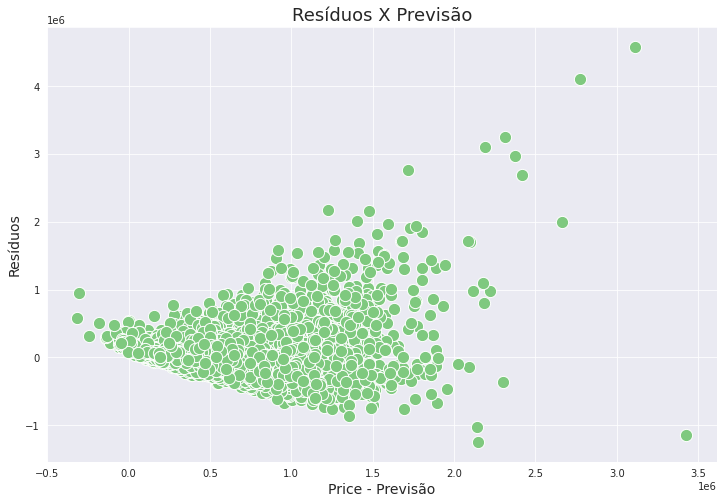

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(12, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Price - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

<Axes: title={'center': 'Resíduos X Previsão'}, xlabel='Price - Previsão', ylabel='Resíduos²'>

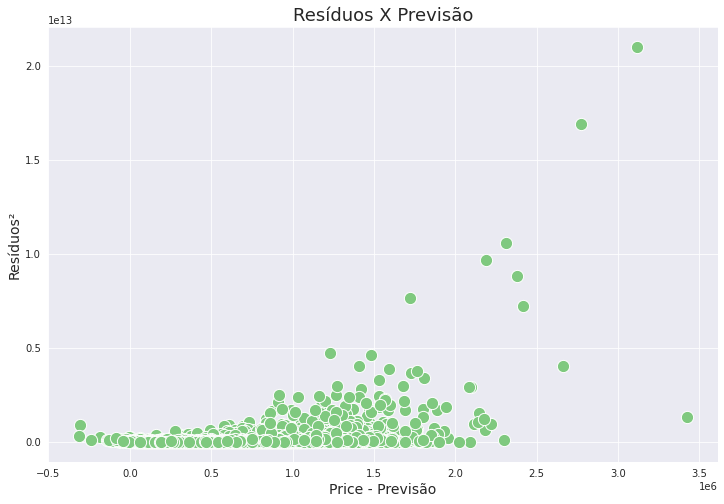

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo**2, s=150)
ax.figure.set_size_inches(12, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Price - Previsão', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax

<Axes: title={'center': 'Distribuição de Frequências dos Resíduos'}, xlabel='Moeda (Price)', ylabel='Density'>

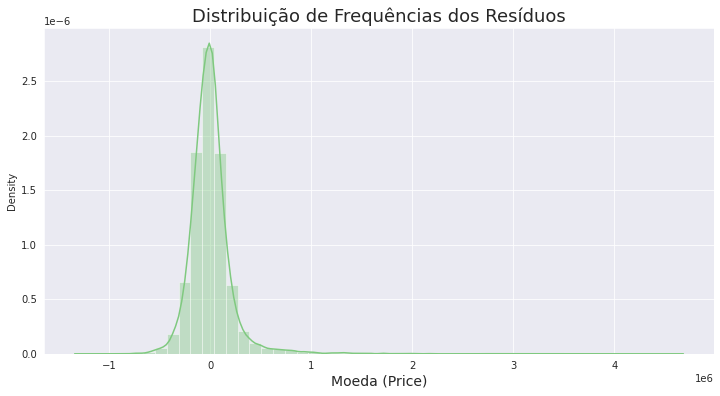

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Moeda (Price)', fontsize=14)
ax

# 📪 Salvando e carregando o modelo estimado

In [ ]:
import pickle

In [ ]:
output = open('modelo_preco_imoveis', 'wb')
pickle.dump(model, output)
output.close()

Em um outro notebook:

In [ ]:
modelo = open('modelo_preco_imoveis','rb')
preco_imoveis = pickle.load(modelo)
modelo.close()

In [ ]:
lat=100.000	
sqft_basement=1
view=1	
bedrooms=10
bathrooms=3.0
sqft_above=10000
grade=4
sqft_living=12000
entrada=[[lat, sqft_basement, view, bedrooms, bathrooms, sqft_above, grade, sqft_living]]

print('{0:.2f} price'.format(preco_imoveis.predict(entrada)[0]))

36895232.41 price


## 📲 Simulador Interativo

In [ ]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

# Criando os controles do formulário
lat = widgets.Text(description="Lat:")
sqft_basement = widgets.Text(description="sqft_basement:")
view = widgets.Text(description="view:")
bedrooms = widgets.Text(description="bedrooms:")
bathrooms = widgets.Text(description="bathrooms:")
sqft_above = widgets.Text(description="sqft_above:")
grade = widgets.Text(description="grade:")
sqft_living = widgets.Text(description="sqft_living:")

botao = widgets.Button(description="Simular")

# Posicionando os controles
left = VBox([lat, view, grade, bedrooms, bathrooms])
right = VBox([sqft_basement, sqft_above, sqft_living])
inputs = HBox([left, right])

# Função de simulação
def simulador(sender):
    entrada=[[
                float(lat.value if lat.value else 0), 
                float(view.value if view.value else 0), 
                float(bathrooms.value if bathrooms.value else 0), 
                float(bedrooms.value if bedrooms.value else 0), 
                float(grade.value if grade.value else 0), 
                float(sqft_living.value if sqft_living.value else 0),
                float(sqft_above.value if sqft_above.value else 0),
                float(sqft_basement.value if sqft_basement.value else 0)
             ]]
    print('$ {0:.2f}'.format(preco_imoveis.predict(entrada)[0]))

# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador) 

In [ ]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())